In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#convert grades into int
df = pd.read_csv('data_with_scores.csv') 
df['Positive rate in reviews'] = df['Positive rate in reviews'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
df['SteamDB score'] = df['SteamDB score'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)
df['Current price'] = df['Current price'].str.replace(',','.')
df['Current price'] = df['Current price'].str.replace('-','0')
df['Current price'] = df['Current price'].str.replace('Free','0.00€')
df

,Game ID,Genres,Developers,Publishers,Release date,Current price,Number of reviews,Positive rate in reviews,SteamDB score,Minimum requirements,Recommended requirements,Min configuration class
0,568070,"['Action', 'Adventure', 'Indie']",['Triplevision Games'],['Graffiti Games'],"23 Aug, 2019",3.12€,58,60.0,57.31,"{'Processor': ' 2ghz dual core cpu', 'Memory':...",{},1
1,568090,"['Action', 'Indie']",['Waygetter Electronics'],"['Little Flag Software, LLC']","28 Dec, 2016",2.39€,2027,91.0,87.13,"{'Processor': ' 2.0 ghz dual core processor', ...",{},1
2,568130,"['Action', 'Adventure', 'Indie']",['Nickana Studio'],['Nickana Studio'],"3 Jan, 2017",3.99€,20,65.0,59.00,"{'Processor': ' 1.4ghz or faster', 'Memory': '...",{},0
3,568180,"['Action', 'Adventure', 'Indie']",['Sword Twin Studios Ltd.'],['Sword Twin Studios Ltd.'],"31 Mar, 2017",0.00€,12,92.0,72.42,"{'Processor': ' 2.5 ghz dual core', 'Memory': ...",{},1
4,568200,"['Casual', 'Indie']",['Bruno Freitas'],['Bruno Freitas'],"19 Dec, 2016",1.99€,28,93.0,77.30,"{'Processor': ' intel/amd dual core 1,2ghz', '...",{'Processor': ' intel(r) celeron(r) cpu j1800...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17179,1044490,"['Adventure', 'Indie']",['SukeraSparo'],"['MangaGamer', 'mirai works']","21 Jun, 2019",9.99€,365,97.0,89.05,"{'Processor': ' pentium iii 800mhz', 'Memory':...","{'Processor': 'Not specified', 'Memory': ' 1 G...",0
17180,1044500,"['Animation & Modeling', 'Design & Illustratio...","[""Sin's Temptation""]","[""Sin's Temptation""]","22 Mar, 2019",1.97€,51,73.0,65.69,{'Processor': ' 2.0 ghz intel i5 or equivalent...,{'Processor': ' 3.4 ghz intel i7 or equivalent...,2
17181,1044620,"['Adventure', 'Casual']","['sprite', 'NekoNyan Ltd.']","['NekoNyan Ltd.', 'HIKARI FIELD']","27 Sep, 2019",22.49€,1788,99.0,93.55,"{'Processor': ' 1.3 ghz', 'Memory': ' 4 GB RAM...",{},0
17182,1044630,"['Adventure', 'Indie', 'RPG']",['Choice of Games'],['Choice of Games'],"21 Mar, 2019",2.39€,14,43.0,46.02,"{'Processor': 'Not specified', 'Memory': 'Not ...",{},0


## Analysis of the distribution of the Positive rate in reviews according to class

In [51]:
for i in range(0,4):
    print("Stats of of Min configuration of class ", i)
    print(df[df['Min configuration class']==i]['Positive rate in reviews'].describe(), "\n")

Stats of of Min configuration of class  0
count    9903.000000
mean       71.140563
std        20.128015
min         0.000000
25%        59.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Positive rate in reviews, dtype: float64 

Stats of of Min configuration of class  1
count    3585.000000
mean       69.776011
std        19.987909
min         0.000000
25%        56.000000
50%        74.000000
75%        86.000000
max       100.000000
Name: Positive rate in reviews, dtype: float64 

Stats of of Min configuration of class  2
count    2340.000000
mean       69.872222
std        19.323187
min         5.000000
25%        57.000000
50%        74.000000
75%        86.000000
max        99.000000
Name: Positive rate in reviews, dtype: float64 

Stats of of Min configuration of class  3
count    1356.000000
mean       66.716077
std        19.921908
min         7.000000
25%        52.000000
50%        70.000000
75%        83.000000
max       100.000000
Name: Positiv

The number of positive reviews seems to decrease more the recommended config are high. The mean seems to gradually decrease.

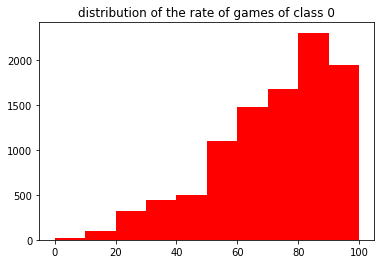

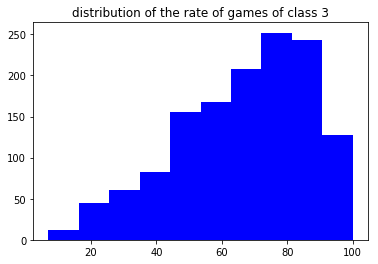

In [52]:
class_0 = df[df['Min configuration class']==0]
class_3 = df[df['Min configuration class']==3]

f = plt.figure(1)
plt.hist(class_0['Positive rate in reviews'], color="red")
plt.title("distribution of the rate of games of class 0")
plt.show()

g = plt.figure(2)
plt.hist(class_3['Positive rate in reviews'], color="blue")
plt.title("distribution of the rate of games of class 3")

plt.show()

The mean of the grades of class 3 is a bit lower than those of class 0. We can see that this is because the distribution is bit different. For class 3, not many games have a very high grade (above 90). Furthermore, the grade are uch more distributed with many more games having a low grade (below 50) 

In [53]:
low_grades = df[df['Positive rate in reviews']<50]
very_high_grades = df[df['Positive rate in reviews']>90]

print("overall proportion of low grades: ",  100*len(low_grades)/len(df))
print("class 0 proportion of low grades: ", 100*len(low_grades[low_grades['Min configuration class']==0])/len(class_0))
print("class 3 proportion of low grades: ", 100*len(low_grades[low_grades['Min configuration class']==3])/len(class_3), "\n")

print("overall proportion of very high grades: ",  100*len(very_high_grades)/len(df))
print("class 0 proportion of very high grades: ", 100*len(very_high_grades[very_high_grades['Min configuration class']==0])/len(class_0))
print("class 3 proportion of very high grades: ", 100*len(very_high_grades[very_high_grades['Min configuration class']==3])/len(class_3))


overall proportion of low grades:  14.565875232774674
class 0 proportion of low grades:  13.995758860951227
class 3 proportion of low grades:  17.625368731563423 

overall proportion of very high grades:  15.735567970204842
class 0 proportion of very high grades:  17.287690598808442
class 3 proportion of very high grades:  9.43952802359882


Class 3 has a higher propotion of low graded games and a much lower proportion of games with very high grades. Class 0 games have a  higher proportion of games with very high grades than the average

## Analysis of the distribution of the Positive rate in reviews according to class

In [104]:
for i in range(0,4):
    print("Number of reviews for class", i)
    print(df[df['Min configuration class']==i]['Number of reviews'].describe(), "\n")

Number of reviews for class 0
count     9903.000000
mean       256.032515
std       1713.561327
min          1.000000
25%         10.000000
50%         27.000000
75%         89.000000
max      77148.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 1
count     3585.000000
mean       427.776290
std       2502.771808
min          0.000000
25%         11.000000
50%         33.000000
75%        126.000000
max      78179.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 2
count     2340.000000
mean       494.891880
std       3389.296361
min          2.000000
25%         10.000000
50%         25.000000
75%         96.000000
max      85491.000000
Name: Number of reviews, dtype: float64 

Number of reviews for class 3
count     1356.000000
mean       628.825959
std       4241.508661
min          2.000000
25%          9.000000
50%         23.000000
75%         76.000000
max      80911.000000
Name: Number of reviews, dtype: float64 



The mean of the number of reviews per game for class 3 is much higher. The game are more sophisticated and are for a more dedicated community. Thus, the gamers are more likely to leave reviews. Whereas, the mean of the number of reviews per game for class 0 is much lower than average. As the games are likely to be less time-consuming and probably less work was given to it, many games don't have many reviews.

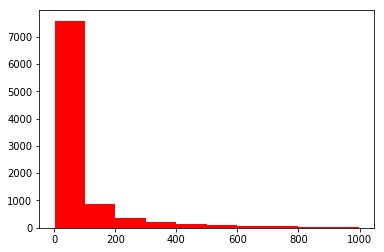

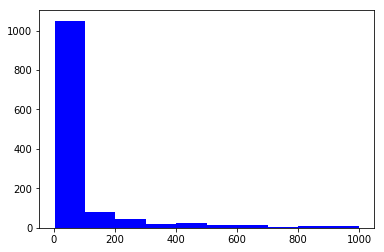

In [59]:
class_0 = df[df['Min configuration class']==0]
class_3 = df[df['Min configuration class']==3]

f = plt.figure(1)
plt.hist(class_0[class_0['Number of reviews']<1000]['Number of reviews'], color="red")
plt.show()

g = plt.figure(2)
plt.hist(class_3[class_3['Number of reviews']<1000]['Number of reviews'], color="blue")
plt.show()

In [56]:
df[df['Number of reviews']>1000].groupby('Min configuration class')['Game ID'].count()

Min configuration class
0    411
1    228
2    156
3     89
Name: Game ID, dtype: int64

Even if the mean of the number of review, the vast majority of games have below 100 reviews. The mean of class 3 is much higer but the majority of games with a lot of reviews (above 1000) are of class 0.

## Analysis of the dependance between number of review, positive rate and class

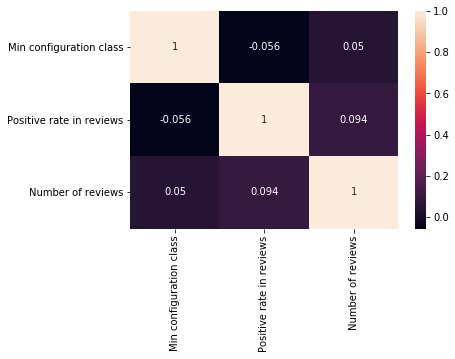

In [57]:
corrMatrix = df[["Min configuration class", "Positive rate in reviews", "Number of reviews"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


Very low correlation (after modification of table, look at coorelation matric with price and date release)

Text(0,0.5,'Positive rate in reviews')

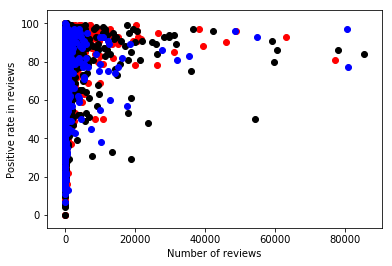

In [58]:
plt.scatter(df[df["Min configuration class"]==0]['Number of reviews'], df[df["Min configuration class"]==0]['Positive rate in reviews'], color = "red")
plt.scatter(df[df["Min configuration class"]==1]['Number of reviews'], df[df["Min configuration class"]==1]['Positive rate in reviews'], color = "black")
plt.scatter(df[df["Min configuration class"]==2]['Number of reviews'], df[df["Min configuration class"]==2]['Positive rate in reviews'], color = "black")
plt.scatter(df[df["Min configuration class"]==3]['Number of reviews'], df[df["Min configuration class"]==3]['Positive rate in reviews'], color = "blue")

plt.xlabel("Number of reviews")
plt.ylabel("Positive rate in reviews")

## Analysis of the genres

In [56]:
Action = df[df['Genres'].str.contains("Action") == True]
Adventure = df[df['Genres'].str.contains("Adventure") == True]
RPG = df[df['Genres'].str.contains("RPG") == True]
Strategy = df[df['Genres'].str.contains("Strategy") == True]
Simulation = df[df['Genres'].str.contains("Simulation") == True]
Casual = df[df['Genres'].str.contains("Casual") == True]
Indie = df[df['Genres'].str.contains("Indie") == True]
Sports = df[df['Genres'].str.contains("Sports") == True]

print(df['Positive rate in reviews'].describe(), "\n")
print(Action['Positive rate in reviews'].describe(), "\n")
print(Adventure['Positive rate in reviews'].describe(), "\n")
print(RPG['Positive rate in reviews'].describe(), "\n")
print(Strategy['Positive rate in reviews'].describe(), "\n")
print(Simulation['Positive rate in reviews'].describe(), "\n")
print(Casual['Positive rate in reviews'].describe(), "\n")
print(Indie['Positive rate in reviews'].describe(), "\n")
print(Sports['Positive rate in reviews'].describe(), "\n")

count    17133.000000
mean        70.351661
std         20.006998
min          0.000000
25%         57.000000
50%         75.000000
75%         87.000000
max        100.000000
Name: Positive rate in reviews, dtype: float64 

count    6917.000000
mean       69.274975
std        20.087615
min         6.000000
25%        56.000000
50%        73.000000
75%        86.000000
max        99.000000
Name: Positive rate in reviews, dtype: float64 

count    6722.000000
mean       70.746206
std        20.155928
min         0.000000
25%        58.000000
50%        75.000000
75%        87.000000
max       100.000000
Name: Positive rate in reviews, dtype: float64 

count    2982.000000
mean       71.142857
std        19.154689
min         7.000000
25%        60.000000
50%        75.000000
75%        87.000000
max       100.000000
Name: Positive rate in reviews, dtype: float64 

count    3171.000000
mean       68.806370
std        19.268951
min         0.000000
25%        57.000000
50%        72.00000

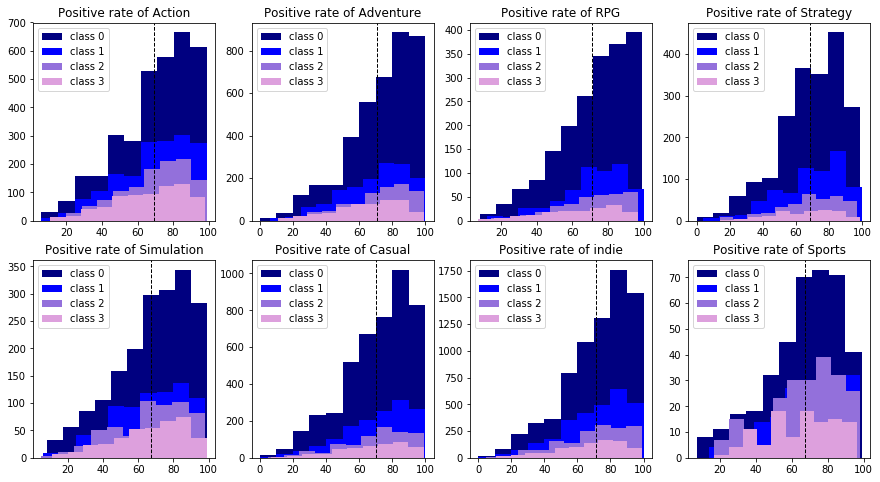

In [57]:
plt.figure(figsize=(15,8))

plt.subplot(241)
plt.hist(Action[Action['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Action[Action['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Action[Action['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Action[Action['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Action")
plt.axvline(Action['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.subplot(242)
plt.hist(Adventure[Adventure['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Adventure[Adventure['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Adventure[Adventure['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Adventure[Adventure['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Adventure")
plt.axvline(Adventure['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(243)
plt.hist(RPG[RPG['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(RPG[RPG['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(RPG[RPG['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(RPG[RPG['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of RPG")
plt.axvline(RPG['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(244)
plt.hist(Strategy[Strategy['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Strategy[Strategy['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Strategy[Strategy['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Strategy[Strategy['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Strategy")
plt.axvline(Strategy['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(245)
plt.hist(Simulation[Simulation['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Simulation[Simulation['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Simulation[Simulation['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Simulation[Simulation['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Simulation")
plt.axvline(Simulation['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(246)
plt.hist(Casual[Casual['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Casual[Casual['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Casual[Casual['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Casual[Casual['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Casual")
plt.axvline(Casual['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(247)
plt.hist(Indie[Indie['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Indie[Indie['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Indie[Indie['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Indie[Indie['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of indie")
plt.axvline(Indie['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.subplot(248)
plt.hist(Sports[Sports['Min configuration class']==0]['Positive rate in reviews'], color="navy", label = 'class 0')
plt.hist(Sports[Sports['Min configuration class']==1]['Positive rate in reviews'], color="blue", label = 'class 1')
plt.hist(Sports[Sports['Min configuration class']==2]['Positive rate in reviews'], color="mediumpurple", label = 'class 2')
plt.hist(Sports[Sports['Min configuration class']==3]['Positive rate in reviews'], color="plum", label = 'class 3')
plt.legend()
plt.title("Positive rate of Sports")
plt.axvline(Sports['Positive rate in reviews'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.show()

There doesn't seem to be any correlation betwen the genre of the game and the rate given by the users. However, these chats show that there isn't the same distribution of classes for each genres. For instance, it seem that Strategy and Casual games don't need to have important material as the porportion of class 2/3 is very low. However, Sports , Simulation and Action games, whose graphics are much more evolved and rapid apparently need more high tech material.

In [67]:
print("proportion of class 3 : ", 100*len(df[df['Min configuration class']==3])/len(df))

print("proportion of class 3 for simulation game: ", 100*len(Simulation[Simulation['Min configuration class']==3])/len(Simulation))


proportion of class 3 :  7.902877487888869
proportion of class 3 for simulation game:  10.835654596100278


## Price Analysis

In [50]:
symbols = ['₩','₴','pуб','$','Free']
for p in df['Current price']:
    for s in symbols:
        if s in p :
            print(p) 
            

#df = df.drop(df['€' not in df['Current price']].index)

for i in range(len(df['Current price'])):
    if '€' not in df['Current price'].iloc[i]:
        df = df.drop(i, axis = 0)

df['Current price'].unique()

₩ 64.800
HK$ 3.08
₩ 15.840
ARS$ 33.99
₩ 2.950
295₴
₩ 5.000
₩ 48.860
82 pуб.
₩ 4.550


IndexError: single positional indexer is out-of-bounds